# ECED 4406 Assignment 0x001 Cryptography Notebook 
## By Matthew Cockbunrn B00788268

## Question 1 
### Part A 


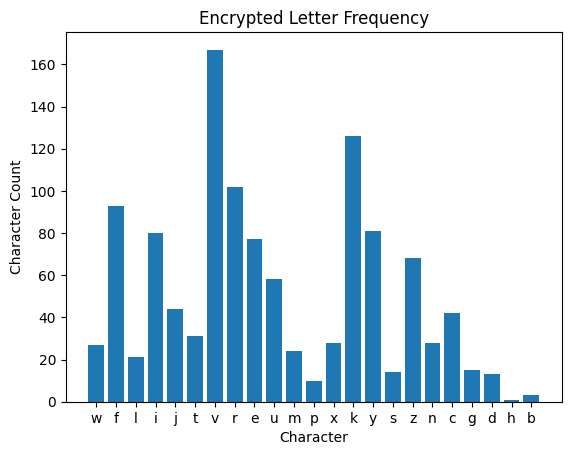

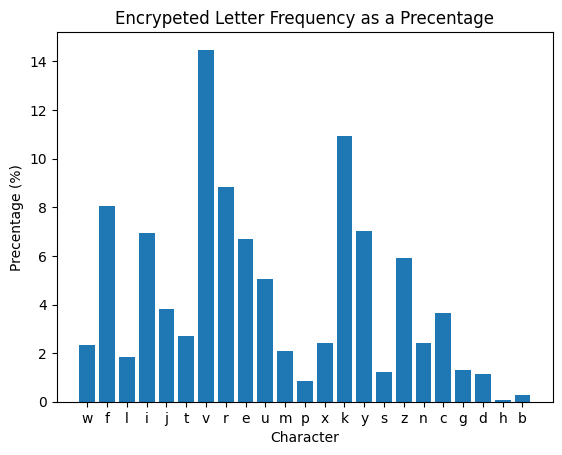

In [25]:
import matplotlib.pyplot as plt
# Input Raw Text
input = "Wflijtfiv reu jvmve pvrij rxf fli wrkyvij siflxyk wfiky, fe kyzj tfekzevek, r evn erkzfe, tfetvzmvu ze czsvikp, reu uvuztrkvu kf kyv gifgfjzkzfe kyrk rcc dve riv tivrkvu vhlrc. Efn nv riv vexrxvu ze r xivrk tzmzc nri, kvjkzex nyvkyvi kyrk erkzfe, fi rep erkzfe jf tfetvzmvu, reu jf uvuztrkvu, tre cfex veuliv. Nv riv dvk fe r xivrk srkkcv-wzvcu fw kyrk nri. Nv yrmv tfdv kf uvuztrkv r gfikzfe fw kyrk wzvcu, rj r wzerc ivjkzex-gcrtv wfi kyfjv nyf yviv xrmv kyvzi czmvj, kyrk kyrk erkzfe dzxyk czmv. Zk zj rckfxvkyvi wzkkzex reu gifgvi kyrk nv jyflcu uf kyzj. Slk, ze r crixvi jvejv, nv treefk uvuztrkv, nv treefk tfejvtirkv—nv treefk yrccfn—kyzj xifleu. Kyv sirmv dve, czmzex reu uvru, nyf jkilxxcvu yviv, yrmv tfejvtirkvu zk wri rsfmv fli gffi gfnvi kf ruu fi uvkirtk. Kyv nficu nzcc czkkcv efkv, efi cfex ivdvdsvi nyrk nv jrp yviv, slk zk tre evmvi wfixvk nyrk kyvp uzu yviv. Zk zj wfi lj kyv czmzex, irkyvi, kf sv uvuztrkvu yviv kf kyv lewzezjyvu nfib nyzty kyvp nyf wflxyk yviv yrmv kylj wri jf efscp rumretvu. Zk zj irkyvi wfi lj kf sv yviv uvuztrkvu kf kyv xivrk krjb ivdrzezex svwfiv lj—kyrk wifd kyvjv yfefivu uvru nv krbv zetivrjvu uvmfkzfe kf kyrk trljv wfi nyzty kyvp yviv xrmv kyv crjk wlcc dvrjliv fw uvmfkzfe—kyrk nv yviv yzxycp ivjfcmv kyrk kyvjv uvru jyrcc efk yrmv uzvu ze mrze—kyrk kyzj erkzfe, leuvi Xfu, jyrcc yrmv r evn sziky fw wivvufd, reu kyrk xfmviedvek fw kyv gvfgcv, sp kyv gvfgcv, wfi kyv gvfgcv, jyrcc efk gvizjy wifd kyv vriky."

letterFreq = {}

nonchar = [' ', '.', ',','—', '-']
count = 0
for chr in input.lower():
    if chr in nonchar:
        continue
    count += 1
    if chr in letterFreq:
        letterFreq[chr] += 1
    else:
        letterFreq[chr] = 1

# Get the precentage Freq of letters
precentFreq = {}

for i in letterFreq.keys():
    precentFreq[i] = (letterFreq[i] / count) * 100
# Graph Raw Data
plt.bar(range(len(letterFreq)),list(letterFreq.values()), align='center')
plt.xticks(range(len(letterFreq)), list(letterFreq.keys()))
plt.xlabel('Character')
plt.ylabel('Character Count')
plt.title('Encrypted Letter Frequency')
plt.show()

#Graph Precentage Frequence
plt.bar(range(len(precentFreq)), list(precentFreq.values()), align='center')
plt.xticks(range(len(letterFreq)), list(letterFreq.keys()))
plt.xlabel('Character')
plt.ylabel('Precentage (%)')
plt.title('Encrypeted Letter Frequency as a Precentage')
plt.show()

### Part B Standard Engilsh Letter Frequency 
 
 Using the following source 

 > https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html 
 

In [26]:
import pandas as pd
import string

rawData = pd.read_html("https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html ")
numTables = len(rawData)
#print(numTables)
freq_data = rawData[0]
#print(freq_data)
values = freq_data.iloc[:,3:5]
print(values.columns())




         3          4
0   Letter  Frequency
1        E      12.02
2        T       9.10
3        A       8.12
4        O       7.68
5        I       7.31
6        N       6.95
7        S       6.28
8        R       6.02
9        H       5.92
10       D       4.32
11       L       3.98
12       U       2.88
13       C       2.71
14       M       2.61
15       F       2.30
16       Y       2.11
17       W       2.09
18       G       2.03
19       P       1.82
20       B       1.49
21       V       1.11
22       K       0.69
23       X       0.17
24       Q       0.11
25       J       0.10
26       Z       0.07
